# Describing Distributions
Cameron Peace

## Task

In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

The features to analyze: 
* VitD_levels
* Doc_visits
* TotalCharge

For each feature listed:

* [x] Plot a histogram with a kde (kernel density estimate)
* [x] Add a line for the mean (red)
* [x] Add a line for the median (green)
* [x] Add a line for for +1 std from the mean (black)
* [x] Add a line for the - 1 std from the mean (black)
* [x] Highlight the range between +1 and =1 std (yellow)

Answer the following questions:

* Is it Discrete or Continuous?
* Does it have a skew? If so, which direction (+/-)
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

### Data Background

* No information or background was provided for this dataset

## Imports

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# settings
pd.set_option('display.max_columns', None)

## Loading, Viewing Data

In [2]:
# loading data
df = pd.read_csv('medical_data.csv')

# making a backup in case comparison is needed
df_original = df.copy()

In [5]:
# viewing data
df.sample(5)

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
996,MI,42.20472,-83.20589,Urban,2.0,76,33475.93,Divorced,Male,0,17.810233,6,3,0,0,Observation Admission,1,0,High,1,1.0,0.0,NaN,1.0,1.0,1.0,0,1,Intravenous,11.917145,3661.760740,25260.816290
397,OR,44.00425,-123.61199,Urban,1.0,82,37739.87,Never Married,Female,0,15.484030,6,2,0,0,Emergency Admission,1,0,High,1,0.0,0.0,1.0,1.0,1.0,0.0,1,1,Intravenous,22.993218,5102.771833,27482.807710
792,ID,41.97585,-113.65429,Rural,0.0,69,6950.58,Never Married,Female,0,17.003561,4,0,2,0,Elective Admission,0,1,Medium,1,0.0,0.0,0.0,1.0,1.0,0.0,1,0,Blood Work,18.532461,3605.136168,11459.364170
959,KS,38.55470,-96.96230,Suburban,4.0,36,19994.05,Never Married,Female,0,17.585729,4,2,1,0,Emergency Admission,0,0,Medium,1,1.0,1.0,0.0,1.0,0.0,0.0,0,0,Intravenous,10.875760,3491.445428,6678.060246
521,NJ,40.40138,-74.03090,Rural,2.0,74,22360.38,Divorced,Female,0,15.803221,5,1,0,0,NaN,1,0,Medium,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1,Intravenous,6.850591,3113.605758,24541.438520


In [6]:
# viewing data
display(df.info(), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

None

Index(['State', 'Lat', 'Lng', 'Area', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges'],
      dtype='object')

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This appears to be a general medical dataset with a variety of patient information, for our purposes we'll be looking only at 'VitD_levels', 'Doc_visits' and 'TotalCharge'.
</i></font>

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
We have a few NaNs here and there but not in the columns we're focused on for this exercise
</i></font>

## Plotting KDEs for select features

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
I'm going to use a function here for plotting.  A 'for loop' worked too, but this makes it easier to look at the features one at a time
</i></font>

### Defining a function for plotting

In [58]:
def plot_feature(col_name, discrete=False):
    feature = df[col_name]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    
    fig, ax = plt.subplots(figsize=(10,6), dpi=250)
    
    if discrete == True:
        sns.histplot(feature , ax=ax, stat='probability', discrete=True)
        sns.kdeplot(feature, ax=ax)
    else:
        sns.histplot(feature , ax=ax, stat='probability', kde=True)
    
    ax.axvline(mean, color = 'red', label=f'Mean = {mean:,.2f}',)
    ax.axvline(median, ls='--', color='green', label=f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color='black',label=f'+1 std = {plus_one_std:,.2f}', ls=':')
    ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}', ls=':')
    ax.axvspan(plus_one_std, minus_one_std, color='gold', zorder=0, alpha=.2)
    ax.set_title(f'{col_name}', pad=12)
    ax.legend();



### Plotting Total Charge

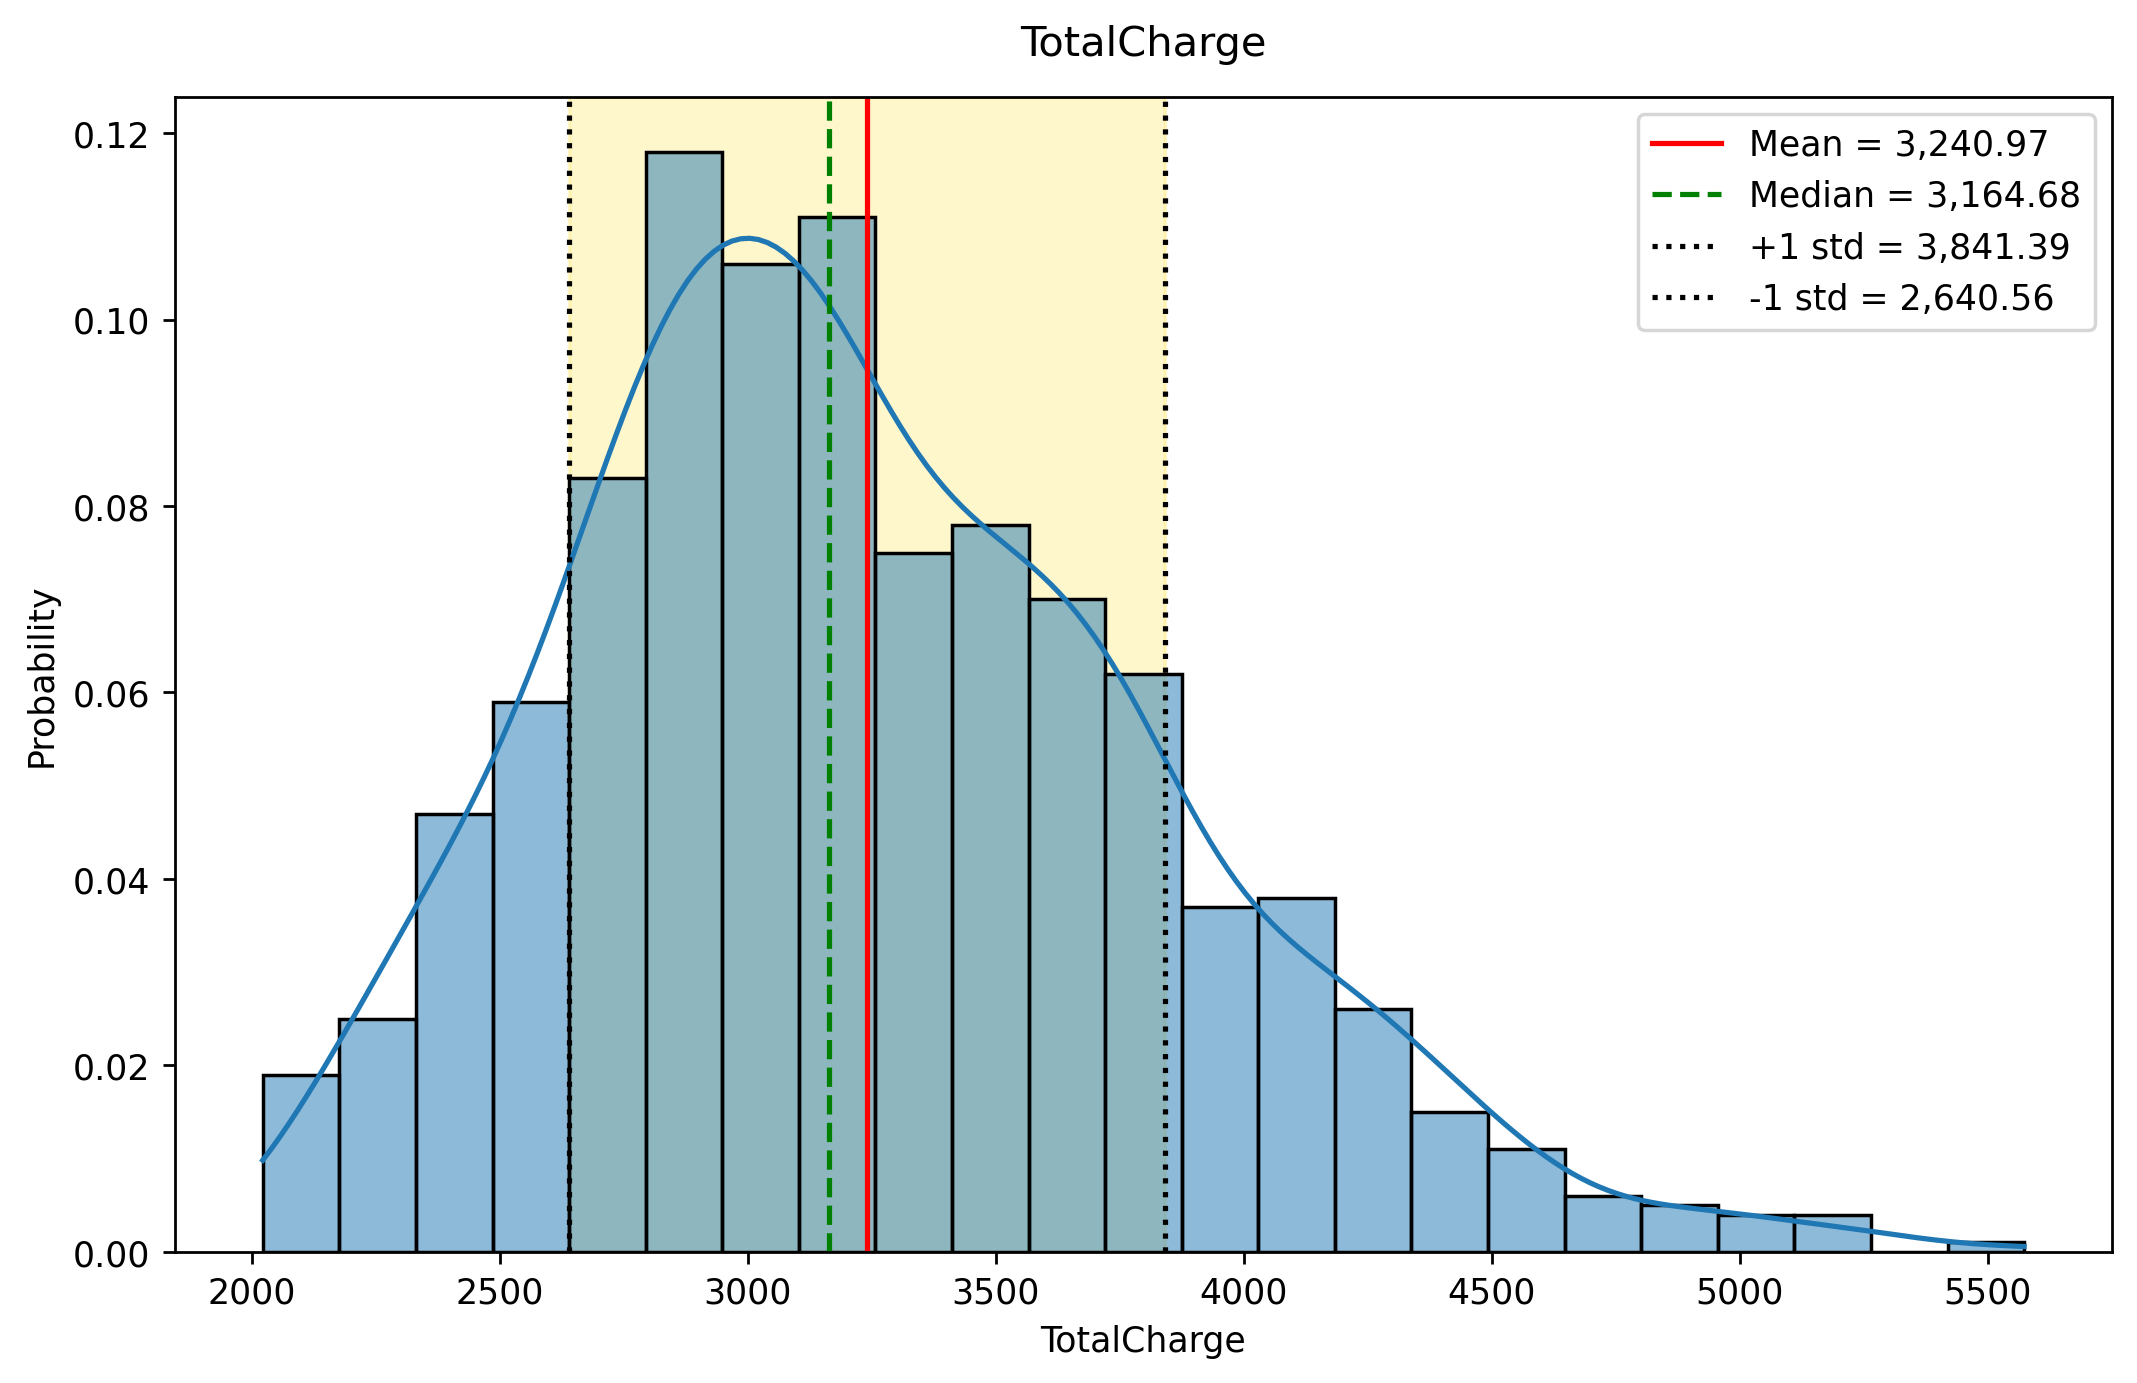

In [55]:
plot_feature('TotalCharge')

### Total Charge Answers

* ***Continuous Data***
* ***Right Skewed (Positive Skew)***
* ***Mesokurtic***

### Plotting Vit_D_levels

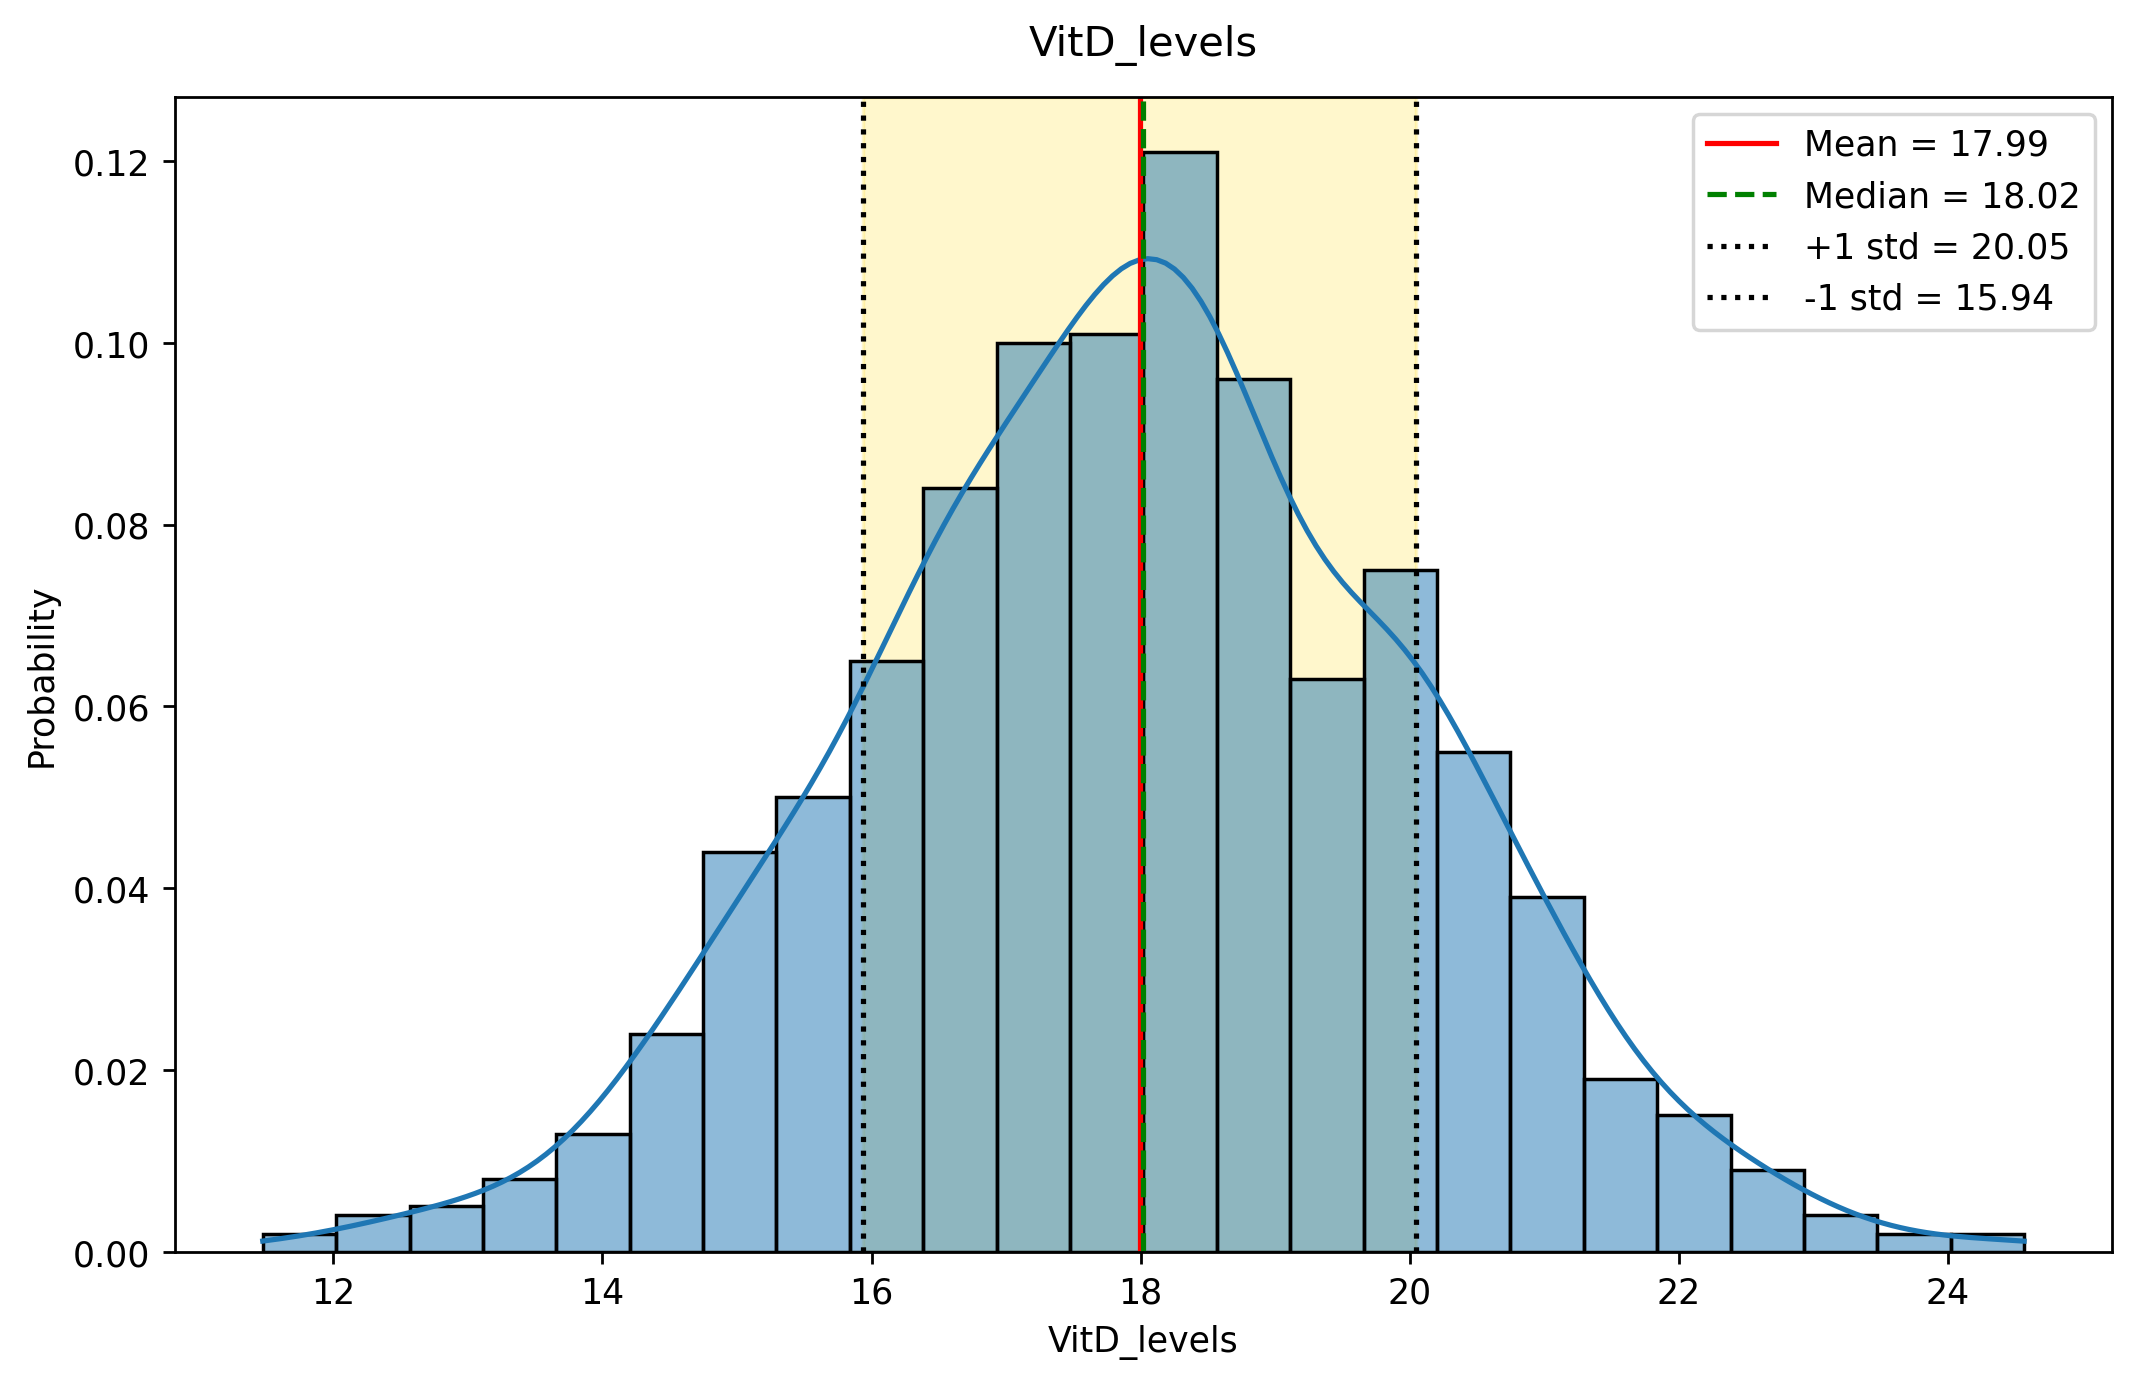

In [56]:
plot_feature('VitD_levels')

### Vit D Levels Answers

* ***Continuous Data***
* ***Zero Skewed***
* ***Mesokurtic to leptokurtic***

### Plotting Doc_Visits

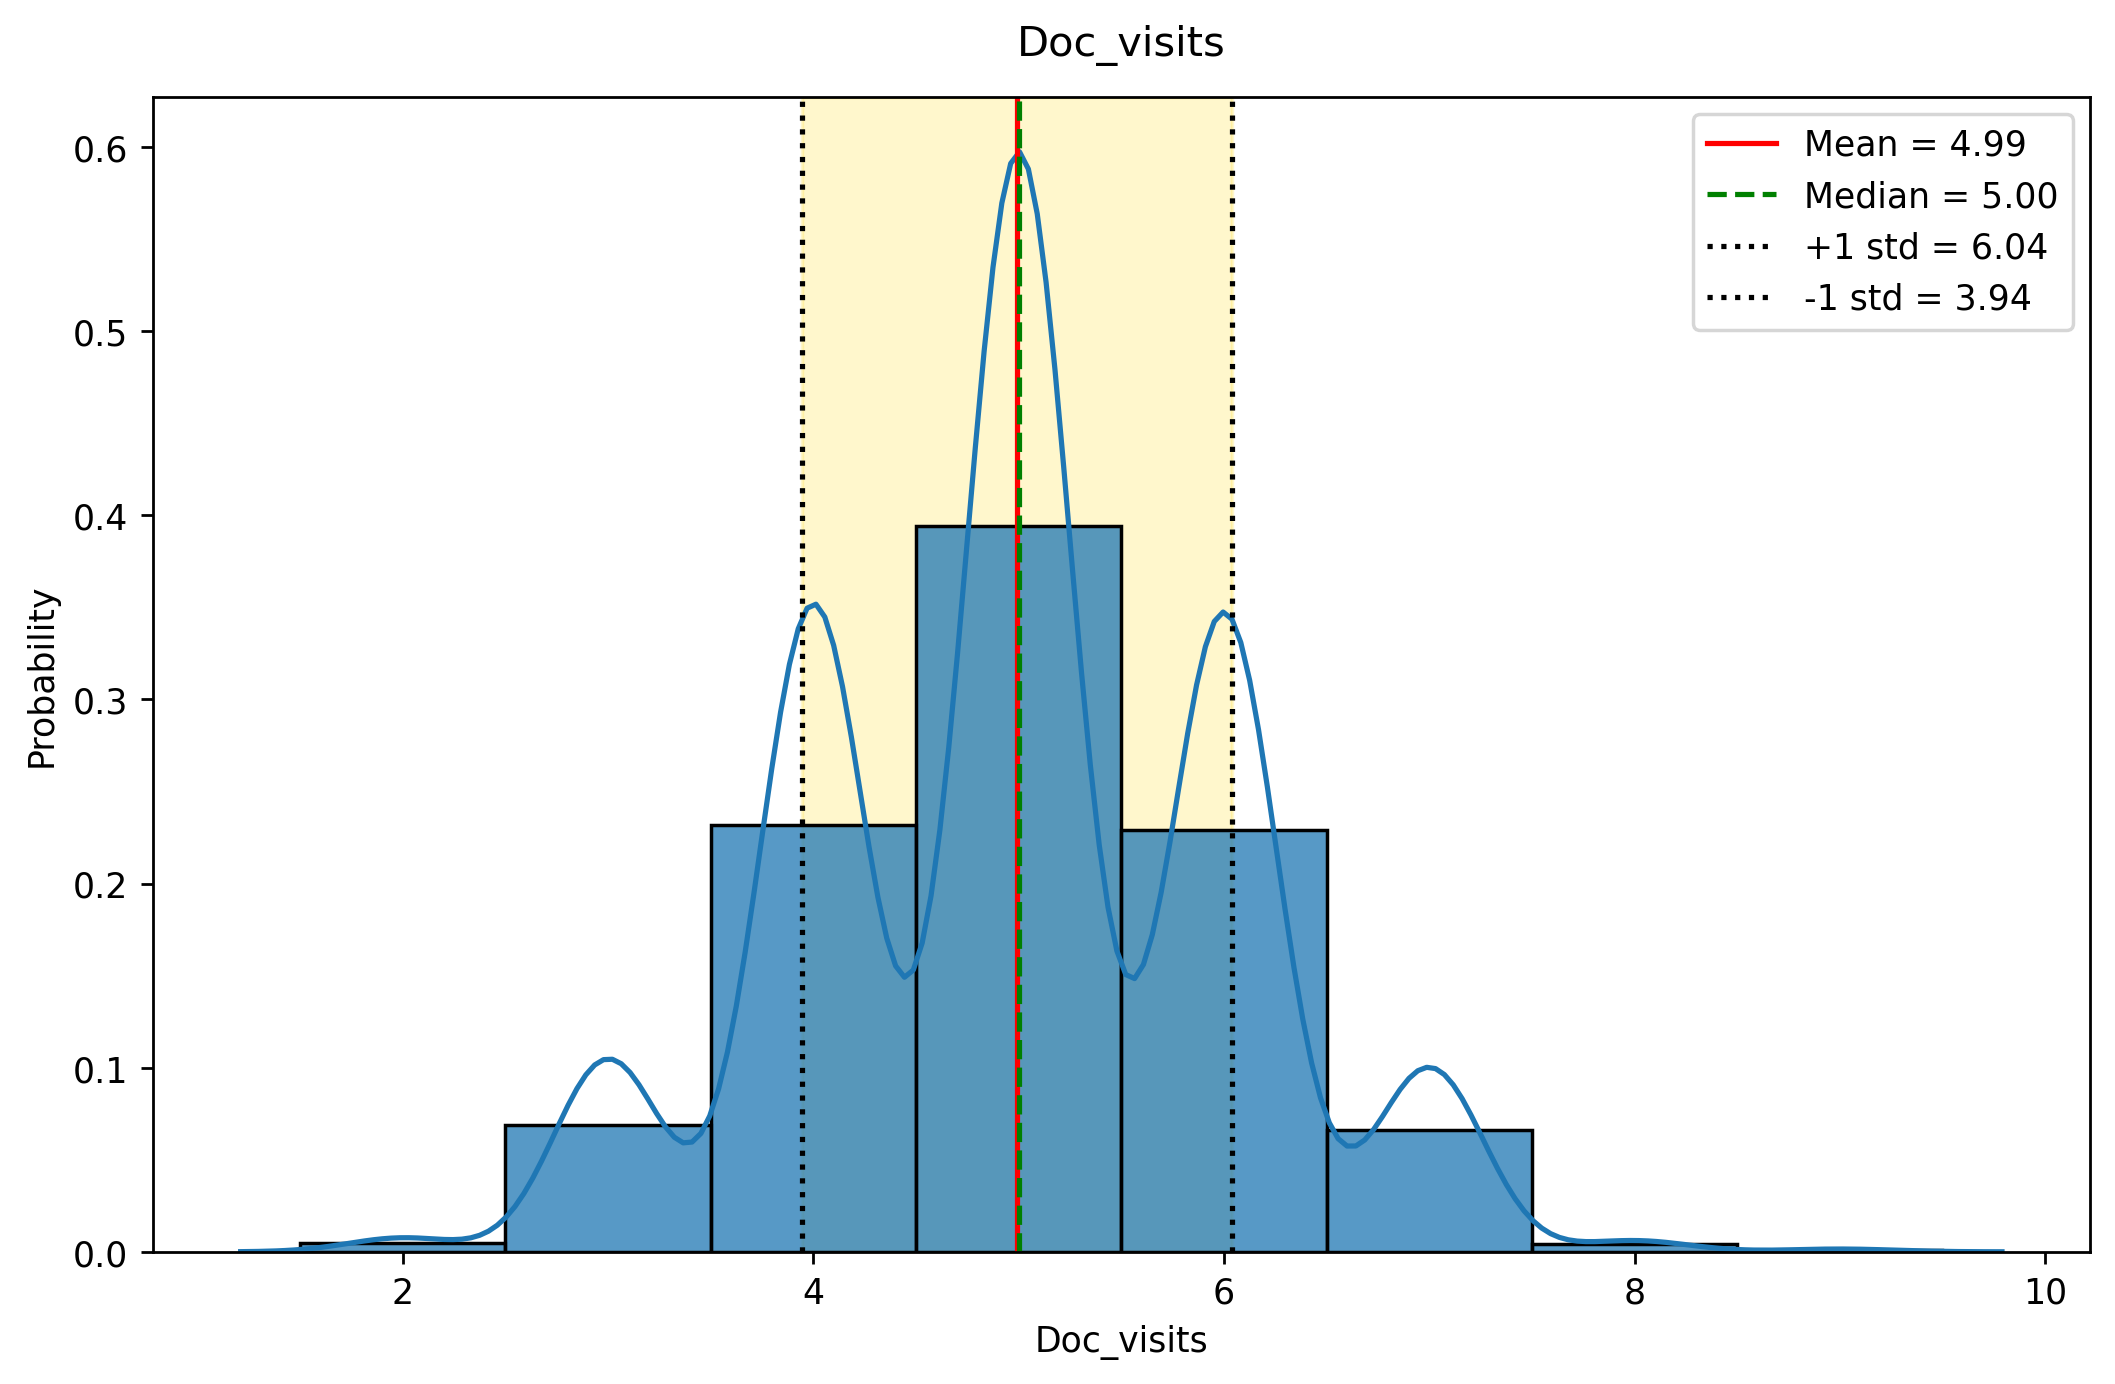

In [59]:
plot_feature('Doc_visits', discrete=True)

### Doc Visits Answers

* ***Discrete Data***
* ***Zero Skew***
* ***Leptokurtic?***

Our kde is wavy to reflect the higher probability of discrete values and the lower probability of a non discrete values.  The distribution is a little too perfect, I suspect the data has been "doctored" itself in some way.